<a href="https://colab.research.google.com/github/MaInthiyaz/OasisInfobite_Data-analytics/blob/main/Customer__Segmentation__AnalysisP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Idea: Customer Segmentation Analysis**
**Project Description:**
The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.
**Key Concepts and Challenges:**
**Data Collection:** Obtain a dataset containing customer information, purchase history, and relevant data.
**Data Exploration and Cleaning:** Explore the dataset, understand its structure, and handle any missing or inconsistent data.
**Descriptive Statistics:** Calculate key metrics such as average purchase value, frequency ofpurchases, etc.
**Customer Segmentation:** Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.
**Visualization:** Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.
**Insights and Recommendations:** Analyze characteristics of each segment and provide insights.
**Learning Objectives:**
Practical experience with clustering algorithms.
Data cleaning and exploration skills.
Visualization techniques for conveying insights.create as per above given tasks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Data Loading
# --------------------
data = pd.read_csv("ifood_df.csv")

# Data Exploration & Cleaning

In [2]:
# Check missing values
print("Missing Values:\n", data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Descriptive statistics
print("\nDescriptive Statistics:\n", data.describe())

Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

# Feature Selection for Clustering

In [3]:
features = ['Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

X = data[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to Determine Optimal Clusters

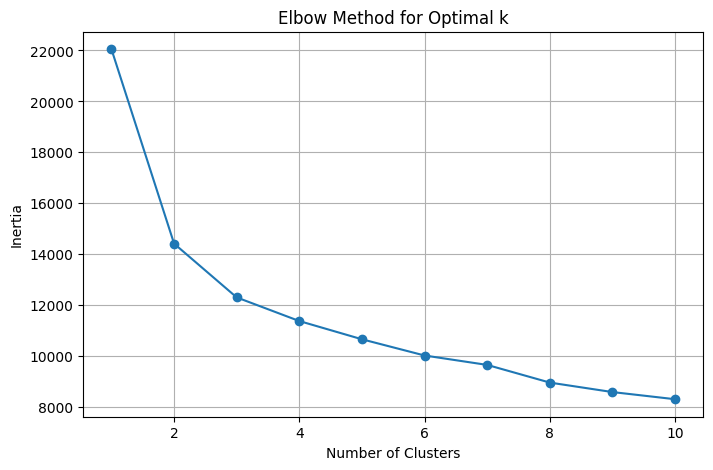

In [4]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


# K-Means Clustering (Assume 4 Clusters for Example)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


# Visualization of Clusters

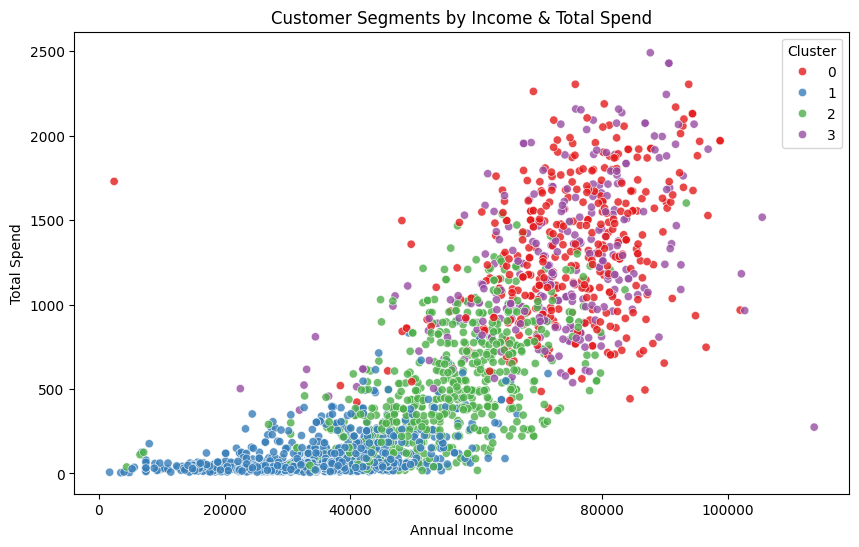

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Income', y='MntTotal', hue='Cluster', palette='Set1', alpha=0.8)
plt.title("Customer Segments by Income & Total Spend")
plt.xlabel("Annual Income")
plt.ylabel("Total Spend")
plt.legend(title='Cluster')
plt.show()

#Insights & Recommendations

In [7]:

for cluster in sorted(data['Cluster'].unique()):
    segment = data[data['Cluster'] == cluster]
    print(f"\nSegment {cluster} Summary:")
    print(segment[features + ['MntTotal']].mean())

print("\n--- Recommendations ---")
print("1. High Income & High Spending segments can be targeted for premium products.")
print("2. Low Income & High Recency segments might need re-engagement campaigns.")
print("3. Analyze individual cluster preferences to tailor marketing strategies.")


Segment 0 Summary:
Income              74975.957105
Kidhome                 0.067024
Teenhome                0.160858
Recency                50.351206
MntWines              699.294906
MntFruits              40.790885
MntMeatProducts       439.981233
MntFishProducts        74.975871
MntSweetProducts       44.241287
MntGoldProds           64.504021
MntTotal             1299.284182
dtype: float64

Segment 1 Summary:
Income              33423.201292
Kidhome                 0.916039
Teenhome                0.357374
Recency                48.978471
MntWines               48.576964
MntFruits               5.728741
MntMeatProducts        27.870829
MntFishProducts         8.167922
MntSweetProducts        5.552207
MntGoldProds           16.475780
MntTotal               95.896663
dtype: float64

Segment 2 Summary:
Income              55068.351047
Kidhome                 0.130435
Teenhome                1.019324
Recency                48.214171
MntWines              365.611916
MntFruits          